# Bounding box detection - Racoon data


## Data files
- images_racoon.rar: contain images of racoons
- train_labels.cv: contains coordinates for bounding box for every image

### Import the necessary libraries

In [1]:
!git clone https://github.com/tensorflow/models

fatal: destination path 'models' already exists and is not an empty directory.


In [2]:
#Verify that models folder exist
!ls -l

total 16
drwx------ 4 root root 4096 Jan 12 04:35 drive
drwxr-xr-x 3 root root 4096 Jan 12 04:37 internal_lab
drwxr-xr-x 7 root root 4096 Jan 12 04:23 models
drwxr-xr-x 1 root root 4096 Dec 18 16:52 sample_data


In [0]:
!apt-get -qq install protobuf-compiler python-pil python-lxml python-tk
!pip install --user Cython  --quiet
!pip install --user contextlib2 --quiet
!pip install --user jupyter --quiet
!pip install --user matplotlib --quiet

In [4]:
#Move to models/research folder
%cd models/research

#Convert protobuf files to Python code using Protobuf compiler installed in previous step
!protoc object_detection/protos/*.proto --python_out=.

/content/models/research


In [5]:
!ls -l object_detection/protos

total 728
-rw-r--r-- 1 root root   6848 Jan 12 06:42 anchor_generator_pb2.py
-rw-r--r-- 1 root root    747 Jan 12 04:23 anchor_generator.proto
-rw-r--r-- 1 root root   4359 Jan 12 06:42 argmax_matcher_pb2.py
-rw-r--r-- 1 root root   1151 Jan 12 04:23 argmax_matcher.proto
-rw-r--r-- 1 root root   2175 Jan 12 06:42 bipartite_matcher_pb2.py
-rw-r--r-- 1 root root    350 Jan 12 04:23 bipartite_matcher.proto
-rw-r--r-- 1 root root   6208 Jan 12 06:42 box_coder_pb2.py
-rw-r--r-- 1 root root    656 Jan 12 04:23 box_coder.proto
-rw-r--r-- 1 root root  35788 Jan 12 06:42 box_predictor_pb2.py
-rw-r--r-- 1 root root   7366 Jan 12 04:23 box_predictor.proto
-rw-r--r-- 1 root root  24908 Jan 12 06:42 calibration_pb2.py
-rw-r--r-- 1 root root   2876 Jan 12 04:23 calibration.proto
-rw-r--r-- 1 root root  13553 Jan 12 06:42 eval_pb2.py
-rw-r--r-- 1 root root   3923 Jan 12 04:23 eval.proto
-rw-r--r-- 1 root root   3445 Jan 12 06:42 faster_rcnn_box_coder_pb2.py
-rw-r--r-- 1 root root    531 Jan 12 04:23 

In [6]:
#Change path to models/research and models/research/slim folders based on where you have cloned github repository above
%set_env PYTHONPATH=$PYTHONPATH:/content/models/research:/content/models/research/slim

env: PYTHONPATH=$PYTHONPATH:/content/models/research:/content/models/research/slim


In [7]:
#To be run from models/research folder
!python object_detection/builders/model_builder_test.py

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTest.test_create_experimental_model
[       OK ] ModelBuilderTest.test_create_experimental_model
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[       OK ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[       OK ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_

In [8]:
#Come to the home directory
%cd /content

/content


In [9]:
!mkdir internal_lab

#Go to the project folder
%cd internal_lab

mkdir: cannot create directory ‘internal_lab’: File exists
/content/internal_lab


In [10]:
!ls -l

total 25972
drwxr-xr-x 3 root root    12288 Apr 22  2019 images
-rw------- 1 root root 26574193 Jan 12 04:36 images_racoon-1.rar
-rw------- 1 root root     7913 Jan 12 04:36 train_labels.csv


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp "/content/drive/My Drive/AIML/Advanced CNN/Lab/Internal/images_racoon-1.rar" .
!cp "/content/drive/My Drive/AIML/Advanced CNN/Lab/Internal/train_labels.csv" .

In [17]:
!pip install patool
import patoolib
patoolib.extract_archive("images_racoon-1.rar", outdir="/content/internal_lab/")

patool: Extracting images_racoon-1.rar ...
patool: running /usr/bin/unrar x -- /content/internal_lab/images_racoon-1.rar
patool:     with cwd='/content/internal_lab/'


PatoolError: ignored

### Change directory

### Load the training data from train.csv file

In [19]:
import pandas as pd
import numpy as np
df = pd.read_csv('train_labels.csv')
df.head(5)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,raccoon-17.jpg,259,194,raccoon,95,60,167,118
1,raccoon-11.jpg,660,432,raccoon,3,1,461,431
2,raccoon-63.jpg,600,400,raccoon,74,107,280,290
3,raccoon-63.jpg,600,400,raccoon,227,93,403,298
4,raccoon-60.jpg,273,185,raccoon,58,33,197,127


### Print the shape of the train dataset

In [20]:
df.shape

(173, 8)

### Declare a variable IMAGE_SIZE = 128 as we will be using MobileNet which will be taking Input shape as 128 * 128 

In [0]:
IMAGE_SIZE = 128

### With the help of csv.reader write a for loop which can load the train.csv file and store the path, width, height, x0,y0,x1,y1 in induvidual variables. <br>
1. Create a list variable known as 'path' which has all the path for all the training images
2. Create an array 'coords' which has the resized coordinates of the bounding box for the training images

<u>Note:</u> All the training images should be downsampled to 128 * 128 as it is the input shape of MobileNet (which we will be using for Object detection). Hence the corresponding coordinates of the bounding boxes should be changed to match the image dimension of 128 * 128 

In [0]:
import csv
with open('train_labels.csv','r') as csvfile:
    paths = []
    coords = np.zeros((sum(1 for line in csvfile) - 1, 4))
    spamreader = csv.reader(csvfile, delimiter=',')
    csvfile.seek(0)
    next(spamreader, None)
    for i,row in enumerate(spamreader):
        #print(row)
        for j, r in enumerate(row): # Parse row with seven entities
            #print(i)
            if((j!= 0) & (j!=3)):
                row[j] = int(r)
            
        #print(row)      
        path, width, height, class_, xmin, ymin, xmax, ymax = row
        paths.append(path)
        #print(i)
        coords[i,0] = xmin * IMAGE_SIZE / width
        coords[i,1] = ymin * IMAGE_SIZE / height
        coords[i,2] = xmax * IMAGE_SIZE / width # Normalize bounding box by image size
        coords[i,3] = ymax * IMAGE_SIZE / height

In [23]:
paths[100]

'raccoon-175.jpg'

### Write a for loop which can load all the training images into a variable 'batch_images' using the paths from the 'paths' variable
<u>Note:</u> Convert the image to RGB scale as the MobileNet accepts 3 channels as inputs   

In [0]:
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input

batch_images = np.zeros((len(paths),IMAGE_SIZE,IMAGE_SIZE,3),dtype= np.float32)

In [61]:
batch_images.shape

(173, 128, 128, 3)

In [0]:
from PIL import Image

for i,x in enumerate(paths):
  img = Image.open('/content/internal_lab/images/'+ x)
  img = img.resize((IMAGE_SIZE,IMAGE_SIZE))
  img = img.convert('RGB')
  batch_images[i] = preprocess_input(np.array(img, dtype = np.float32))

 


In [63]:
batch_images.shape

(173, 128, 128, 3)

### Import MobileNet and load MobileNet into a variable named 'model' which takes input shape of 128 * 128 * 3. Freeze all the layers. Add convolution and reshape layers at the end to ensure the output is 4 coordinates

In [0]:
from keras.applications.mobilenet import MobileNet

model = MobileNet(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),alpha = 1.0)



In [0]:
for layer in model.layers:
  layer.trainable = False

In [66]:
model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32) 

In [0]:
import keras
X = model.layers[-1].output
X = keras.layers.Conv2D(4,kernel_size = (4,4))(X)


In [0]:
X = keras.layers.Reshape((4,))(X)

In [0]:
from keras.models import Model
model = Model(inputs=model.input, outputs=X)

In [0]:
from keras.backend import epsilon

### Define a custom loss function IoU which calculates Intersection Over Union

In [0]:
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height
    
    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

#     Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tf.py_func(loss, [y_true, y_pred], tf.float32)
    return iou

### Write model.compile function & model.fit function with: <br>
1. Optimizer = Adam, Loss = 'mse' and metrics = IoU
2. Epochs = 30, batch_size = 32, verbose = 1

In [0]:
import tensorflow as tf
model.compile(loss = 'mse', optimizer= 'adam',metrics = [IoU] )

In [73]:
batch_images.shape

(173, 128, 128, 3)

In [74]:
model.fit(batch_images, coords,
                    batch_size=32,
                    epochs=30,
                    verbose = 1)



Epoch 1/30
173/173 [==============================] - 8s 48ms/step - loss: 4013.4459 - IoU: 0.0639
Epoch 2/30
173/173 [==============================] - 6s 32ms/step - loss: 817.9799 - IoU: 0.3993
Epoch 3/30
173/173 [==============================] - 5s 32ms/step - loss: 453.3374 - IoU: 0.5825
Epoch 4/30
173/173 [==============================] - 5s 31ms/step - loss: 601.6152 - IoU: 0.5307
Epoch 5/30
173/173 [==============================] - 5s 32ms/step - loss: 387.8398 - IoU: 0.5968
Epoch 6/30
173/173 [==============================] - 6s 32ms/step - loss: 209.8353 - IoU: 0.6575
Epoch 7/30
173/173 [==============================] - 5s 31ms/step - loss: 213.3405 - IoU: 0.6477
Epoch 8/30
173/173 [==============================] - 5s 32ms/step - loss: 194.4877 - IoU: 0.6643
Epoch 9/30
173/173 [==============================] - 5s 32ms/step - loss: 141.8082 - IoU: 0.7154
Epoch 10/30
173/173 [==============================] - 6s 32ms/step - loss: 130.1044 - IoU: 0.7420
Epoch 11/30
173/

### Pick a test image from the given data

In [0]:
import cv2
image_name = '/content/internal_lab/images/images/raccoon-102.jpg'
unscaled = cv2.imread(image_name) # Original image for display

### Resize the image to 128 * 128 and preprocess the image for the MobileNet model

In [0]:
image_height, image_width, _ = unscaled.shape
image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE))

### Predict the coordinates of the bounding box for the given test image

In [0]:
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))
region = model.predict(x=np.array([feat_scaled]))[0] 

### Plot the test image using .imshow and draw a boundary box around the image with the coordinates obtained from the model

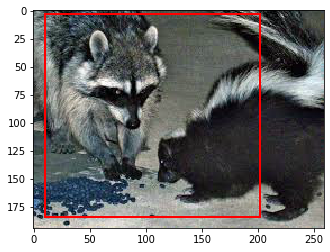

In [104]:
x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[3]) * image_height / IMAGE_SIZE)


import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), (x1 - x0) , (y1 - y0) , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()